In [59]:
import numpy as np
from pysr import PySRRegressor
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [87]:
dataset = []
for n in range(5):
    current = pd.DataFrame(np.linspace(-3, 3, 10), columns=['x'])
    current['mu'] = n - 2
    dataset.append(current)
dataset = pd.concat(dataset, ignore_index=True)
dataset['sigma'] = np.random.choice([1, 2, 3], size=dataset.shape[0])
dataset['a'] = 1 - np.random.rand(dataset.shape[0]) / 10

dataset['y'] = dataset['a'] * np.exp(-(dataset.x-dataset.mu)**2 / (2 * dataset.sigma ** 2))

In [88]:
X = dataset[['x', 'mu', 'sigma', 'a']].values
y = dataset['y'].values

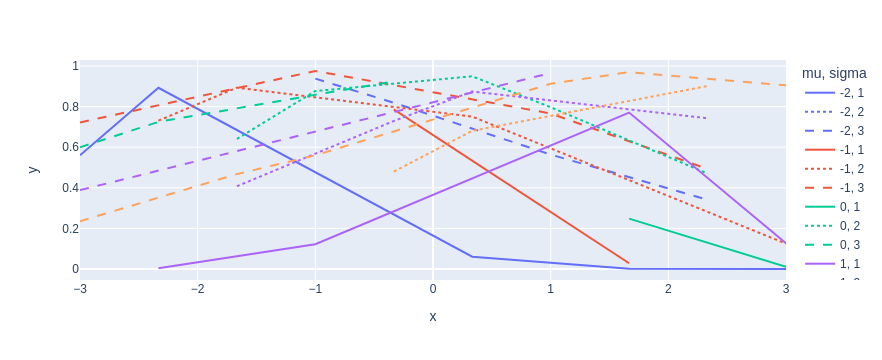

In [89]:
px.line(dataset, 'x', 'y', color='mu', line_dash='sigma')

In [93]:
model = PySRRegressor(
    niterations=1000,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "exp",
        "square(x)=x^2"
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"square": lambda x: x**2},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [94]:
model.fit(X, y)

/home/laurent/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning:

Note: it looks like you are running in Jupyter. The progress bar will be turned off.



Started!

Expressions evaluated per second: 3.620e+05
Head worker occupation: 8.4%
Progress: 768 / 15000 total iterations (5.120%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.055e-01  1.594e+01  y = 0.57708
3           7.979e-02  1.399e-01  y = (0.26629 * x₂)
4           7.259e-02  9.453e-02  y = exp(-1.0303 / x₂)
5           6.882e-02  5.340e-02  y = ((-0.70127 / x₂) + 0.98153)
6           6.706e-02  2.583e-02  y = ((-0.52406 / square(x₂)) + 0.79054)
7           6.612e-02  1.420e-02  y = ((-0.44406 / square(square(x₂))) + 0.71309)
8           6.594e-02  2.675e-03  y = ((-0.44406 / square(square(square(x₂)))) + 0.70208)
9           4.597e-02  3.608e-01  y = exp(-2.1593 / exp((x₀ * x₁) + x₂))
10          4.438e-02  3.510e-02  y = exp((-0.93292 / square(x₂)) / exp(x₀ * x₁))
11          2.995e-02  3.933e-01  y = exp((-0.93292 / x₂) / exp((x₀ * 0.28192) * x₁))
12   

PySRRegressor.equations_ = [
	    pick     score  ...          loss  complexity
	0         0.000000  ...  1.055409e-01           1
	1         0.139866  ...  7.978748e-02           3
	2         0.094530  ...  7.259067e-02           4
	3         0.053398  ...  6.881616e-02           5
	4         0.025828  ...  6.706155e-02           6
	5         0.016757  ...  6.594713e-02           7
	6         0.000175  ...  6.593558e-02           8
	7         0.560253  ...  3.765346e-02           9
	8         0.000024  ...  3.765257e-02          10
	9         3.555332  ...  1.075805e-03          11
	10        3.955165  ...  3.947491e-07          13
	11        4.465776  ...  5.216721e-11          15
	12        1.270692  ...  1.464007e-11          16
	13  >>>>  0.560781  ...  8.356015e-12          17
	
	[14 rows x 5 columns]
]


16          1.464e-11  8.633e+00  y = (square(exp(square((x₀ + (-0.99999 * x₁)) / (x₂ + x₂)) * -...
                                  0.99999)) * x₃)
17          8.356e-12  5.608e-01  y = (exp((square(x₀ + (-0.99999 * x₁)) / -0.99999) / (square(x...
                                  ₂) + square(x₂))) * x₃)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 3.950e+05
Head worker occupation: 8.1%
Progress: 9809 / 15000 total iterations (65.393%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.055e-01  1.594e+01  y = 0.57714
3           7.979e-02  1.399e-01  y = (0.26629 * x₂)
4           7.259e-02  9.453e-02  y = exp(-1.0303 / x₂)
5           6.882e-02  5.340e-02  y = ((-0.70127 / x₂) + 0.98153)
6           6.706e-02  2.583e-02  y = 

In [95]:
model.sympy()

x3*exp(-0.500004750045125*(x0 - 0.9999905*x1)**2/x2**2)

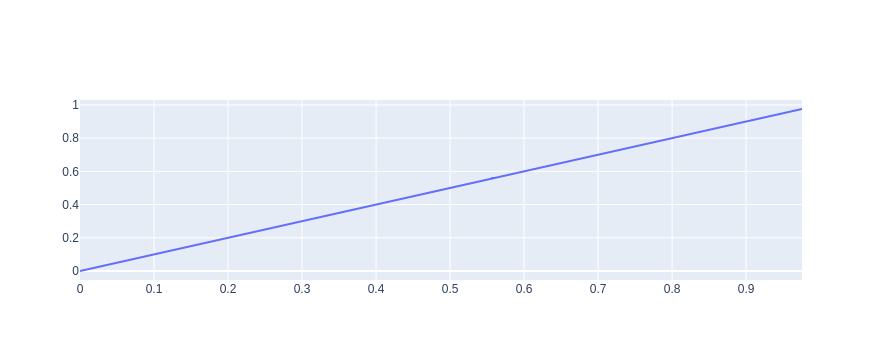

In [97]:
go.Figure(
    go.Scatter(x=y, y=model.predict(X))
)